In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotsoccer

from shapely import geometry
from scipy.spatial import ConvexHull, convex_hull_plot_2d

points = np.random.rand(5, 2)
hull   = ConvexHull(points)

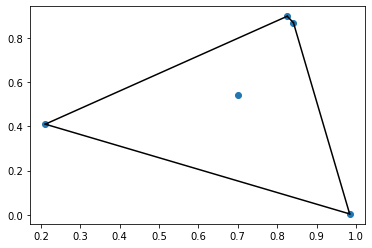

In [2]:
plt.plot(points[:, 0], points[:, 1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

In [3]:
poly = geometry.Polygon(np.array(list(zip(points[hull.vertices, 0], points[hull.vertices, 1]))))
poly.area

0.31842315631870655

In [4]:
import glob

files = glob.glob("*.pkl")

In [5]:
def calc_area(points):
    
    min_x_point = np.min(points[:, 0])
    max_x_point = np.max(points[:, 0])
    min_y_point = np.min(points[:, 1])
    max_y_point = np.max(points[:, 1])
    
    width                   = max_x_point - min_x_point
    height                  = max_y_point - min_y_point
    distance_from_left_side = min_x_point
    
    print(f"Distance: {distance_from_left_side}\nWidth: {width}\nHeight: {height}")
    
    left_point  = points[np.where(points[:, 0] == min_x_point)[0][0]]
    right_point = points[np.where(points[:, 0] == max_x_point)[0][0]]
    upper_point = points[np.where(points[:, 1] == max_y_point)[0][0]]
    lower_point = points[np.where(points[:, 1] == min_y_point)[0][0]]
   
    hull   = ConvexHull(points)
    
    matplotsoccer.field("green",figsize=8, show=False)
    plt.scatter(points[:, 0], points[:, 1])
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        
    plt.axhline(y=max_y_point, linestyle=':')
    plt.axhline(y=min_y_point, linestyle=':')
    
    plt.axvline(x=max_x_point, linestyle=':')
    plt.axvline(x=min_x_point, linestyle=':')
    
    # from left side arrow
    plt.annotate('', xy=(left_point[0], left_point[1]), xycoords='data', xytext=(0, left_point[1]), textcoords='data', arrowprops=dict(facecolor='black', arrowstyle= '<|-|>', lw=3.5))
    plt.text(left_point[0] // 2 - 3, left_point[1] - 1, str(distance_from_left_side), fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=1))
    
    # width
    plt.annotate('', xy=(left_point[0], upper_point[1] + 2), xytext=(right_point[0], upper_point[1] + 2), arrowprops=dict(facecolor='black', arrowstyle= '<|-|>', lw=3.5))
    plt.text(left_point[0] + (width // 2) - 3, upper_point[1] + 1.5, str(width), fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=1))
    
    # height
    plt.annotate('', xy=(right_point[0] + 5.5, upper_point[1]), xytext=(right_point[0] + 5.5, lower_point[1]), arrowprops=dict(facecolor='black', arrowstyle= '<|-|>', lw=3.5))
    plt.text(right_point[0] + 2, lower_point[1] + (height // 2), str(height), fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=1))
    
    plt.xlim(0, 105)
    plt.ylim(0, 65)
    plt.show()
    
    poly = geometry.Polygon(np.array(list(zip(points[hull.vertices, 0], points[hull.vertices, 1]))))
    print(f"Occupied Area: {poly.area}")
    
# points = np.array([[0, 0], [0, 60], [100, 0], [100, 60]])
# calc_area(points)

Distance: 31.0
Width: 24.92
Height: 40.03


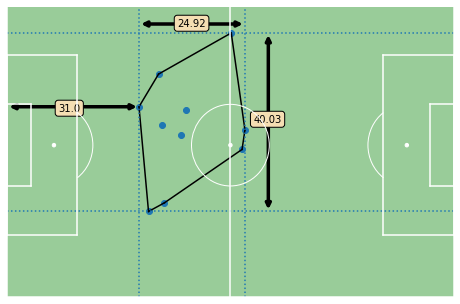

Occupied Area: 638.7391


In [6]:
def calc_area_by_time(files, start_point, end_point):
    mean_pos = []
    
    for file in files:
        data = pd.read_pickle(file)
        extracted_data = data.loc[start_point:end_point]
        pos = extracted_data[['x', 'y']].mean().div(100).round(2).tolist()
        
#         print(f"File: {file} and Pos: {pos}")
        
        mean_pos.append(pos)
    
    mean_pos = np.array(mean_pos)
    
    calc_area(mean_pos)
#     try:   
#         calc_area(mean_pos)
#     except:
#         print(f"Error Occur: {start_point}")

calc_area_by_time(files, "2019-03-03 14:00:00", "2019-03-03 14:05:00")